In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from itertools import chain

In [190]:
df=pd.read_csv("withStockMovement_2.csv")

In [192]:
cond=(df['GME']>=1) | (df['AMC']>=1) | (df['BB']>=1) | (df['NOK']>=1) | (df['TSLA']>=1) 
cond2=df['text'].notna()
cond3=df.index!=283#something wrong w/ this single row 283
cond4=(df['score']>=1)&(df['comms_num']>=1)


In [194]:
df_new=df[cond&cond2&cond3&cond4]
df_new=df_new.iloc[:,1:df_new.shape[1]]
df_new.index=range(df_new.shape[0])#reset index num
df_new=df_new[['score','text','length','GME','AMC','BB','NOK','TSLA','compound','GME_change_1day_prev','AMC_change_1day_prev'
               ,'BB_change_1day_prev','NOK_change_1day_prev','TSLA_change_1day_prev']]

In [195]:
df_new.shape

(13775, 14)

In [196]:
df_new.head()

,score,text,length,GME,AMC,BB,NOK,TSLA,compound,GME_change_1day_prev,AMC_change_1day_prev,BB_change_1day_prev,NOK_change_1day_prev,TSLA_change_1day_prev
0,71,distract gme thought amc brothers aware,80,0,1,0,0,0,-0.2960,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063
1,200,currently holding amc nok retarded think move ...,95,1,1,0,1,0,-0.5719,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063
2,222,need keep movement going make history believe ...,786,0,1,0,0,0,0.8271,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063
3,562,gme premarket musk approved,35,1,0,0,0,0,0.4215,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063
4,382,gme price nothing fundamentals everything fina...,5636,1,0,0,0,0,0.9413,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063


# Feature Extractor

#### Lexical_diversity

In [197]:
def lexical_diversity(my_text_data):
    words = [nltk.word_tokenize(text) for text in my_text_data]
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

In [198]:
df_new["lexical_diversity"] = df_new["text"].apply(lambda x: lexical_diversity(x))

In [292]:
#df_new.to_csv("lex.csv")
df_new=pd.read_csv("lex.csv")

In [293]:
df_new=df_new.iloc[:,1:df_new.shape[1]]
df_new.index=range(df_new.shape[0])#reset index num

In [294]:
df_new.head()

,score,text,length,GME,AMC,BB,NOK,TSLA,compound,GME_change_1day_prev,AMC_change_1day_prev,BB_change_1day_prev,NOK_change_1day_prev,TSLA_change_1day_prev,lexical_diversity
0,71,distract gme thought amc brothers aware,80,0,1,0,0,0,-0.2960,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063,0.410256
1,200,currently holding amc nok retarded think move ...,95,1,1,0,1,0,-0.5719,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063,0.327273
2,222,need keep movement going make history believe ...,786,0,1,0,0,0,0.8271,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063,0.050847
3,562,gme premarket musk approved,35,1,0,0,0,0,0.4215,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063,0.518519
4,382,gme price nothing fundamentals everything fina...,5636,1,0,0,0,0,0.9413,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063,0.007686


In [66]:
def feature_generator(k,df,text_col):
    '''
    return a n*k matrix: each post has the relative frequency in it of top k words in whole dataset 
    '''
    
    #whole text most common
    titles=list(df[text_col])
    words = [nltk.word_tokenize(title) for title in titles]#title broken inside
    word=[w for word in words for w in word]
    f_dist=nltk.FreqDist(w for w in word)
    most_common=f_dist.most_common(k)
    top_words=[w for (w,f) in most_common]
    
    #generate a n*k matrix
    freqs=np.zeros((df.shape[0],k))
    for i in df.index:#better for if index irregular
        text=df[text_col][i]
        post = nltk.word_tokenize(text)
        f_dist=nltk.FreqDist(w for w in post)
        for j in range(k):
                freq=len(post)*f_dist.freq(top_words[j])
                freqs[i,j]=freq
                
    df_freqs=pd.DataFrame(freqs,columns=top_words)
    
    return df_freqs

In [67]:
df_freqs=feature_generator(50,df_new,'text')

In [68]:
df_freqs.head()

,gme,stock,shares,short,com,market,price,like,buy,amc,...,trading,week,last,redd,format,bb,robinhood,preview,width,webp
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,1.0,8.0,5.0,0.0,9.0,5.0,3.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
def appear_only(freqs):
    freqs_appear=freqs.copy()
    for i in range(freqs_appear.shape[0]):
        for j in range(freqs_appear.shape[1]):
            if freqs_appear.iloc[i,j]>=1:
                freqs_appear.iloc[i,j]=1
    return freqs_appear

In [70]:
df_freqs_appear=appear_only(df_freqs)

In [ ]:
#df_freqs_appear

#### Bigrams

In [73]:
def bigram_feature_generator(k,df,text_col):
    
    df_bigram=df.copy()
    #whole text most common
    tokens = [nltk.word_tokenize(t) for t in df[text_col]]
    bgs = nltk.bigrams(list(chain.from_iterable(tokens)))
    fdist_total = nltk.FreqDist(bgs)
    most_common=fdist_total.most_common(k) ## we change it to any other top k
    top_words=[word for (word, freq) in most_common]
    bigrams = [' '.join(i) for i in top_words]
    
  
    for j in range(k):
        df_bigram[bigrams[j]]=df_bigram[text_col].str.contains(bigrams[j])
        
    
    df_bigram.replace([True,False],[1,0],inplace=True)
    
    return df_bigram

Attach

In [71]:


#df_freqs=pd.DataFrame(freqs_appear,columns=list(range(k)))
#df_freqs_bi=pd.DataFrame(freqs_bi_appear,columns=list(range(k)))

df_new=pd.concat([df_new,df_freqs],axis=1)


In [77]:
df_new=bigram_feature_generator(50,df_new,'text')


df_new.sort_values(by=['timestamp'],inplace=True)
df_new.index=list(range(df_new.shape[0]))

In [81]:
df_new.columns

Index(['Unnamed: 0', 'score', 'text', 'length', 'GME', 'AMC', 'BB', 'NOK',
       'TSLA', 'compound',
       ...
       'gme yolo', 'nok bb', 'shares amc', 'com articles', 'number shares',
       'gme squeeze', 'shares available', 'clearing house', 'earnings report',
       'price gme'],
      dtype='object', length=416)

In [3]:
#df_new.to_csv("df_new.csv")
df_new=pd.read_csv("df_new.csv")

In [10]:
df_final=df_new.copy()

In [15]:
df_final['GME_stock_sentiment_interaction']=df_final['GME_change_1day_prev']*df_final['compound']
df_final['AMC_stock_sentiment_interaction']=df_final['AMC_change_1day_prev']*df_final['compound']
df_final['BB_stock_sentiment_interaction']=df_final['BB_change_1day_prev']*df_final['compound']
df_final['NOK_stock_sentiment_interaction']=df_final['NOK_change_1day_prev']*df_final['compound']
df_final['TSLA_stock_sentiment_interaction']=df_final['TSLA_change_1day_prev']*df_final['compound']

# START FROM THIS PART

In [153]:
df_final.to_csv("df_final.csv")
#read

Split

In [100]:
from sklearn.model_selection import train_test_split

X=df_final.drop(['score','text','Unnamed: 0'],axis=1)
y=np.log2(df_final['score'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=42)

In [101]:
X_train.head()

,length,GME,AMC,BB,NOK,TSLA,compound,GME_change_1day_prev,AMC_change_1day_prev,BB_change_1day_prev,...,gme squeeze,shares available,clearing house,earnings report,price gme,GME_stock_sentiment_interaction,AMC_stock_sentiment_interaction,BB_stock_sentiment_interaction,NOK_stock_sentiment_interaction,TSLA_stock_sentiment_interaction
10993,87,1,0,0,0,0,0.2960,0.255730,0.255730,0.255730,...,0,0,0,0,0,0.075696,0.075696,0.075696,0.075696,0.075696
8675,27,1,0,0,0,0,0.0000,0.180052,0.180052,0.180052,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
3821,101,0,1,0,0,0,0.0000,-0.269434,-0.269434,-0.269434,...,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
3692,38,1,0,0,0,0,0.0000,-0.269434,-0.269434,-0.269434,...,0,0,0,0,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
483,341,1,1,0,0,0,0.3597,-0.269434,-0.269434,-0.269434,...,0,0,0,0,0,-0.096915,-0.096915,-0.096915,-0.096915,-0.096915


In [102]:
X_train.shape

(11708, 418)

In [103]:
X_train.columns[:20]

Index(['length', 'GME', 'AMC', 'BB', 'NOK', 'TSLA', 'compound',
       'GME_change_1day_prev', 'AMC_change_1day_prev', 'BB_change_1day_prev',
       'NOK_change_1day_prev', 'TSLA_change_1day_prev', 'lexical_diversity',
       'gme', 'stock', 'shares', 'short', 'com', 'market', 'price'],
      dtype='object')

# Model

Lasso Regression
Feature Selection 

In [137]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [138]:
pipe=make_pipeline(StandardScaler(),LassoCV(cv=5,random_state=0,n_jobs=-1))#have to scale, otherwise poor performance
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(cv=5, n_jobs=-1, random_state=0))])

In [139]:
pipe.score(X_test,y_test)

0.2364211849113157

In [141]:
coefs=pipe.named_steps['lassocv'].coef_
df_coefs=pd.DataFrame(coefs,index=X_train.columns,columns=['coefficient'])
df_coefs['abs_coef']=abs(df_coefs['coefficient'])
df_coefs.sort_values(by=['abs_coef'],ascending=False,inplace=True)

In [150]:
coefs[:5]

array([ 0.        ,  0.23095156, -0.13700842, -0.00490572, -0.21987932])

In [142]:
df_coefs.head(10)

,coefficient,abs_coef
GME_change_1day_prev,1.088391,1.088391
edit,0.396127,0.396127
lexical_diversity,0.386938,0.386938
buy gme,-0.332546,0.332546
GME,0.230952,0.230952
GME_stock_sentiment_interaction,-0.228075,0.228075
NOK,-0.219879,0.219879
holy moly,0.219052,0.219052
buy amc,-0.199681,0.199681
gme yolo,0.172827,0.172827


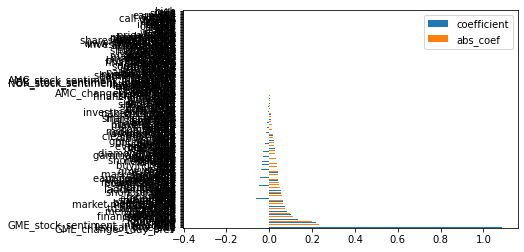

In [152]:
df_coefs[:300].plot(kind='barh')
plt.show()

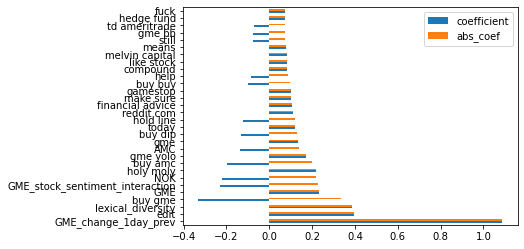

In [149]:
df_coefs[:30].plot(kind='barh')
plt.show()

# Interpretation

-1 unit change in std scale in X is associated with beta*100 % change in upvotes:
EX1.gme return moves up by 1 std in our dataset, upvotes moveup 100%
EX2. 'gme' mentioned move up 1 std, upvotes up 23% 
-interaction terms being important, show that the moderator effect of stock retrun
->stock return maginfies the sentiment effect

Random Forest

In [5]:
from sklearn.tree import DecisionTreeRegressor


In [32]:
X_sub=X.drop(['GME_change_1day_prev', 'AMC_change_1day_prev', 'BB_change_1day_prev','NOK_change_1day_prev', 'TSLA_change_1day_prev'],axis=1)

In [44]:
dt= DecisionTreeRegressor(random_state=0,max_depth=3)
dt.fit(X_sub,y)

DecisionTreeRegressor(max_depth=3, random_state=0)

[Text(620.0, 396.375, 'length <= 780.5\nsquared_error = 15.23\nsamples = 100.0%\nvalue = 5.879'),
 Text(310.0, 283.125, 'buy <= 0.5\nsquared_error = 16.538\nsamples = 68.5%\nvalue = 5.18'),
 Text(155.0, 169.875, 'length <= 92.5\nsquared_error = 16.376\nsamples = 54.5%\nvalue = 5.726'),
 Text(77.5, 56.625, 'squared_error = 16.744\nsamples = 27.9%\nvalue = 6.491'),
 Text(232.5, 56.625, 'squared_error = 14.739\nsamples = 26.6%\nvalue = 4.926'),
 Text(465.0, 169.875, 'length <= 505.0\nsquared_error = 11.502\nsamples = 14.0%\nvalue = 3.056'),
 Text(387.5, 56.625, 'squared_error = 10.56\nsamples = 12.1%\nvalue = 2.688'),
 Text(542.5, 56.625, 'squared_error = 11.256\nsamples = 1.9%\nvalue = 5.35'),
 Text(930.0, 283.125, 'edit <= 0.5\nsquared_error = 9.016\nsamples = 31.5%\nvalue = 7.399'),
 Text(775.0, 169.875, 'gme <= 6.5\nsquared_error = 8.636\nsamples = 23.1%\nvalue = 6.973'),
 Text(697.5, 56.625, 'squared_error = 8.368\nsamples = 21.1%\nvalue = 6.847'),
 Text(852.5, 56.625, 'squared_error

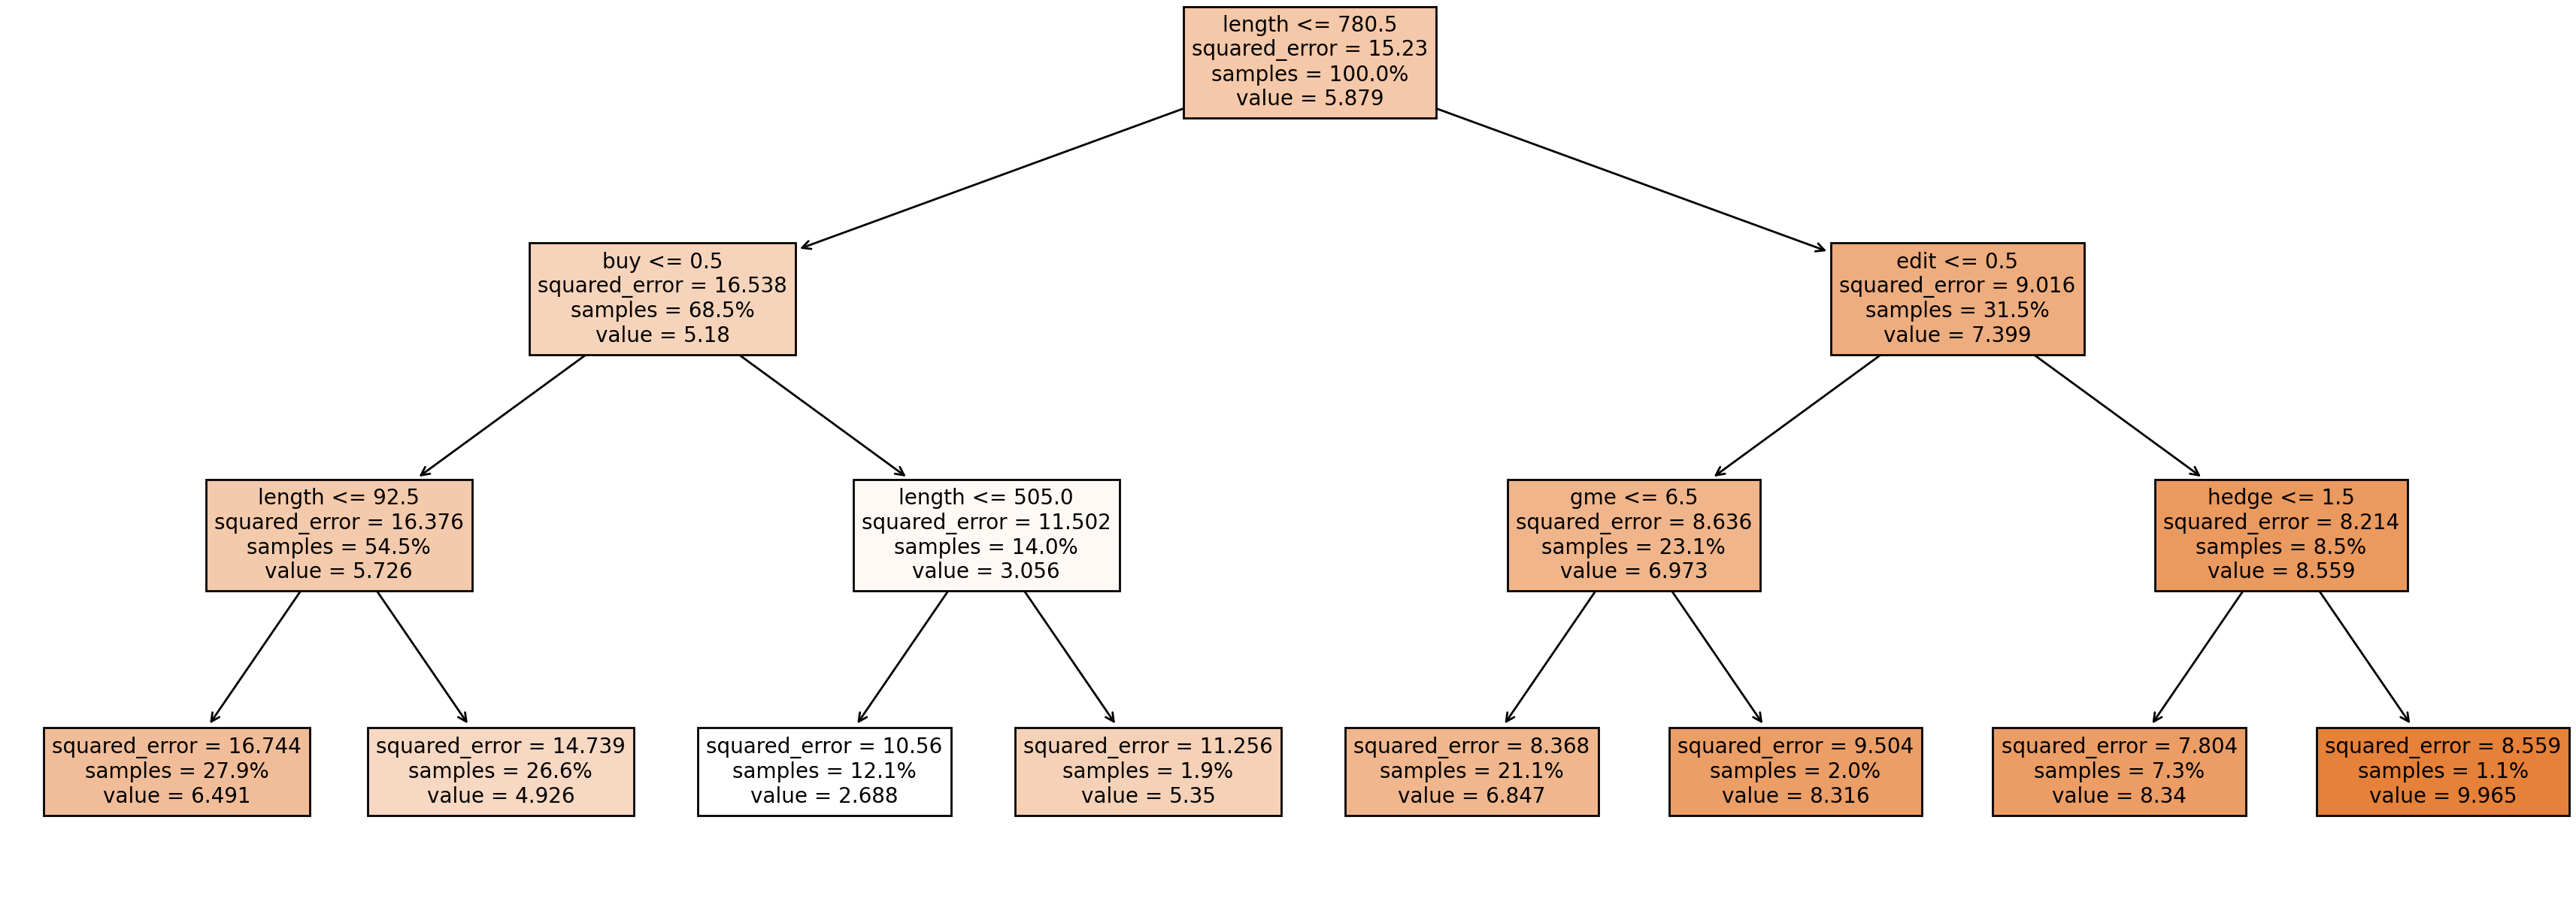

In [59]:
from sklearn import tree
plt.figure(figsize=(8,3),dpi=200)
tree.plot_tree(dt,fontsize=10,feature_names=X_sub.columns,filled=True,proportion=True)

#### Ramdom Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor


In [22]:
rf = RandomForestRegressor(n_jobs=-1,min_samples_split=100, n_estimators=300,max_features='sqrt',random_state=0,oob_score=True)
rf.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


RandomForestRegressor(max_features='sqrt', min_samples_split=100,
                      n_estimators=300, n_jobs=-1, oob_score=True,
                      random_state=0)

In [23]:
rf.score(X_train,y_train)

0.6425310676502628

In [24]:
rf.oob_score_

0.548326469942678

In [129]:
print("R2 score: ",rf.score(X_test,y_test))

R2 score:  0.5569959152329718


In [37]:
def plot_feature_importances(model,names):
    plt.barh(range(model.n_features_), model.feature_importances_, align='center')
    #plt.yticks(np.arange(model.n_features_), names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Overall Feature Importance")
    plt.ylim(-1, model.n_features_)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


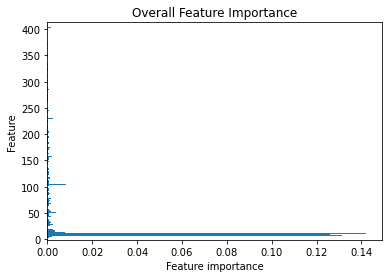

In [38]:
plot_feature_importances(rf,X_train.columns)
#note: rf tend to overestimate numerical.high-cardinality features

In [39]:
rf_importances=sorted([(X_train.columns[i],rf.feature_importances_[i]) for i in range(rf.n_features_) ],key=lambda x : x[1],reverse=True)

In [40]:
rf_importances[:20]

[('TSLA_change_1day_prev', 0.14208728553734834),
 ('GME_change_1day_prev', 0.13137517896279863),
 ('AMC_change_1day_prev', 0.13109931200095085),
 ('BB_change_1day_prev', 0.12600464263124644),
 ('NOK_change_1day_prev', 0.12107950441199784),
 ('length', 0.03314107665566831),
 ('lexical_diversity', 0.032882789707539044),
 ('compound', 0.01141273939813823),
 ('buy', 0.008512249643885273),
 ('edit', 0.008486270240964745),
 ('gme', 0.007840271330607414),
 ('robinhood', 0.006709768343087221),
 ('nok', 0.004831007987998482),
 ('short', 0.004358241673476187),
 ('GME', 0.004100686211685941),
 ('day', 0.003788517384697034),
 ('com', 0.0036163723844550633),
 ('squeeze', 0.003530101273571868),
 ('amc', 0.003371336027963186),
 ('shares', 0.0033500092389981773)]

In [382]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_test, y_test, n_repeats=2,n_jobs=-1,
                                random_state=0)

In [317]:
result.importances_mean[:5]

array([3.97763114e-02, 5.01168146e-03, 6.73941088e-04, 5.06441999e-05,
       9.19203110e-04])

In [383]:
rf_importances_permut=sorted([(X_train.columns[i],result.importances_mean[i]) for i in range(rf.n_features_) ],key=lambda x : x[1],reverse=True)

In [388]:
rf_importances_permut[:50]

[('TSLA_change_1day_prev', 0.06606428672931347),
 ('BB_change_1day_prev', 0.055914489004144974),
 ('NOK_change_1day_prev', 0.05197564843608671),
 ('GME_change_1day_prev', 0.046931484791616185),
 ('AMC_change_1day_prev', 0.044195199067215585),
 ('length', 0.03231977450963763),
 ('lexical_diversity', 0.020034843517436618),
 ('edit', 0.007301272412618742),
 ('compound', 0.006991355454068315),
 ('comments', 0.006599026348961923),
 ('th', 0.005307126565767539),
 ('GME', 0.005245890023718447),
 ('robinhood', 0.00447768632797263),
 ('buy', 0.00380293240207491),
 ('gme', 0.003445468618874181),
 ('TSLA', 0.0034080573510281154),
 ('nok', 0.0032287277322329277),
 ('com', 0.002919474793065535),
 ('melvin', 0.0020429006343880562),
 ('holy moly', 0.0019218692570800444),
 ('news', 0.0017424065812625678),
 ('year', 0.0016412265357837463),
 ('shares', 0.0015659594857352355),
 ('really', 0.001553556535945022),
 ('short', 0.0014513705969819157),
 ('gamestop', 0.0014305011691194691),
 ('everyone', 0.00140

In [390]:
word_col=[word for (word,_) in rf_importances_permut]
importance_col=[importance for (_,importance) in rf_importances_permut]


<AxesSubplot:title={'center':'numerics feature importance'}>

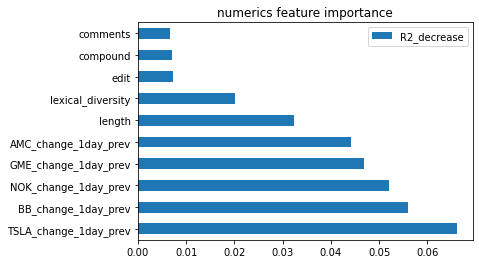

In [428]:
df_importance.iloc[:10].plot(kind='barh',title='numerics feature importance')

<AxesSubplot:title={'center':'word feature importance 1'}>

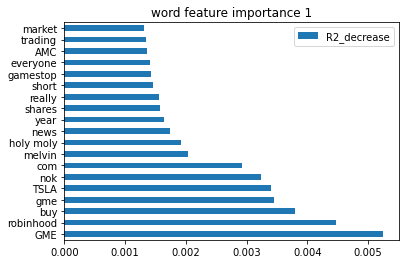

In [436]:
df_importance.iloc[11:30].plot(kind='barh',title='word feature importance 1')

<AxesSubplot:title={'center':'word feature importance 2'}>

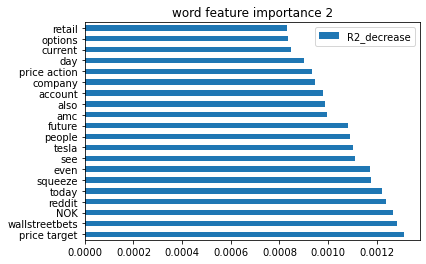

In [430]:
df_importance.iloc[30:50].plot(kind='barh',title='word feature importance 2')